**TensorFlow** is an end-to-end open source platform for machine learning. It has a comprehensive, flexible ecosystem of tools, libraries, and community resources that lets researchers push the state-of-the-art in ML and developers easily build and deploy ML-powered applications.
It supports the following:
* Multidimensional-array based numeric computation
* GPU and distributed computing
* Automatic differentiation
* A large ecosystem of tools, libraries, and community resources
* Model construction, training and export 

# Tensors
TensorFlow operates on multidimensional arrays or tensors represented as tf.Tensor objects. 
A tf.Tensor object has a data type and a shape and it is created by TensorFlow operations or by the user using the tf.constant function.
Here is a two-dimensional tensor:

In [1]:
import tensorflow as tf

x = tf.constant([[1., 2., 3.,],
                 [4., 5., 6.,]])
print(x)
print(x.shape)
print(x.dtype)

2023-03-30 16:08:12.674093: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX512_VNNI
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


tf.Tensor(
[[1. 2. 3.]
 [4. 5. 6.]], shape=(2, 3), dtype=float32)
(2, 3)
<dtype: 'float32'>


2023-03-30 16:08:15.181406: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX512_VNNI
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-30 16:08:15.182276: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 


The most important attributes of a tf.Tensor are its shape and dtype:

* Tensor.shape: tells you the size of the tensor along each of its axes.
* Tensor.dtype: tells you the type of all the elements in the tensor.

TensorFlow implements standard mathematical operations on tensors, as well as many operations specialized for machine learning.

In [3]:
# Summation
x + x

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 2.,  4.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [4]:
# Multiplication by a scalar
5 * x

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 5., 10., 15.],
       [20., 25., 30.]], dtype=float32)>

In [5]:
# Matrix multiplication
x @ tf.transpose(x) 

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[14., 32.],
       [32., 77.]], dtype=float32)>

In [8]:
# Concatenation
print(tf.concat([x, x, x], axis=0))
print(tf.concat([x, x, x], axis=1))

tf.Tensor(
[[1. 2. 3.]
 [4. 5. 6.]
 [1. 2. 3.]
 [4. 5. 6.]
 [1. 2. 3.]
 [4. 5. 6.]], shape=(6, 3), dtype=float32)
tf.Tensor(
[[1. 2. 3. 1. 2. 3. 1. 2. 3.]
 [4. 5. 6. 4. 5. 6. 4. 5. 6.]], shape=(2, 9), dtype=float32)


In [11]:
# Softmax Normalization
print(tf.nn.softmax(x, axis=0))
print(tf.nn.softmax(x)) # axis=-1 is the default
print(tf.nn.softmax(x, axis=1))
print(tf.nn.softmax(x, axis=-1))


tf.Tensor(
[[0.04742587 0.04742587 0.04742587]
 [0.95257413 0.95257413 0.95257413]], shape=(2, 3), dtype=float32)
tf.Tensor(
[[0.09003057 0.24472848 0.66524094]
 [0.09003057 0.24472848 0.66524094]], shape=(2, 3), dtype=float32)
tf.Tensor(
[[0.09003057 0.24472848 0.66524094]
 [0.09003057 0.24472848 0.66524094]], shape=(2, 3), dtype=float32)
tf.Tensor(
[[0.09003057 0.24472848 0.66524094]
 [0.09003057 0.24472848 0.66524094]], shape=(2, 3), dtype=float32)


In [13]:
# Summation of elements
print(tf.reduce_sum(x)) # Summation over all elements
print(tf.reduce_sum(x, axis=0))
print(tf.reduce_sum(x, axis=1))

tf.Tensor(21.0, shape=(), dtype=float32)
tf.Tensor([5. 7. 9.], shape=(3,), dtype=float32)
tf.Tensor([ 6. 15.], shape=(2,), dtype=float32)


Typically, anywhere a TensorFlow function expects a Tensor as input, the function will also accept anything that can be converted to a Tensor using tf.convert_to_tensor. See below for an example.
All standard Python op constructors apply this function to each of their Tensor-valued inputs, which allows those ops to accept numpy arrays, Python lists, and scalars in addition to Tensor objects.

**Note**: This function diverges from default Numpy behavior for float and string types when None is present in a Python list or scalar. Rather than silently converting None values, an error will be thrown.

In [14]:
import numpy as np

print(tf.convert_to_tensor([1,2,3]))
print(tf.convert_to_tensor([1,2,3.]))
print(tf.convert_to_tensor([1,2,3.], dtype=tf.float64))
print(tf.convert_to_tensor(np.array([1,2,3.], dtype=np.float64)))
print(tf.convert_to_tensor(np.array([[1,2,3.], [3, 6., 8]], dtype=np.float64)))


tf.Tensor([1 2 3], shape=(3,), dtype=int32)
tf.Tensor([1. 2. 3.], shape=(3,), dtype=float32)
tf.Tensor([1. 2. 3.], shape=(3,), dtype=float64)
tf.Tensor([1. 2. 3.], shape=(3,), dtype=float64)
tf.Tensor(
[[1. 2. 3.]
 [3. 6. 8.]], shape=(2, 3), dtype=float64)


Running large calculations on CPU can be slow. When properly configured, TensorFlow can use accelerator hardware like GPUs to execute operations very quickly.

In [2]:
if tf.config.list_physical_devices('GPU'):
    print("TensorFlow **IS** using the GPU")
else:
    print("TensorFlow **IS NOT** using the GPU")
    print("Available devices:")
    print(tf.config.list_physical_devices())

TensorFlow **IS NOT** using the GPU
Available devices:
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


# Variables
Normal tf.Tensor objects are immutable. To store model weights (or other mutable state) in TensorFlow use a tf.Variable.
tf.Variable objects store mutable tf.Tensor values accessed via the read_value and assign methods. The assign method also allows you to change the value of a tf.Variable.

In [18]:
var = tf.Variable([[1., 2., 3.,], [4., 5., 6.,]])
print(var)

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>


In [21]:
print(var.assign(2 * var))
print(var.assign_add([[1., 1., 1.,], [1., 1., 1.,]]))
print(var[0, 1].assign(42))

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 8., 16., 24.],
       [32., 40., 48.]], dtype=float32)>
<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 9., 17., 25.],
       [33., 41., 49.]], dtype=float32)>
<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 9., 42., 25.],
       [33., 41., 49.]], dtype=float32)>


# Automatic differentiation
TensorFlow can automatically compute the derivative of a computation with respect to its input variables. This is useful for implementing machine learning algorithms such as gradient descent and for automatically producing gradients of the loss with respect to each model parameter.
**Gradient descent** and related algorithms are a cornerstone of modern machine learning. TensorFlow provides tf.GradientTape, a feature for automatically computing the gradient of a computation with respect to its input variables.

In [25]:
x = tf.Variable(3.0)

def f(x):
    return x**2 + 10*x + 3

In [26]:
f(x)

<tf.Tensor: shape=(), dtype=float32, numpy=42.0>

In [28]:
with tf.GradientTape() as tape:
    y = f(x)

dy_dx = tape.gradient(y, x) # computes the derivative of y with respect to x at x=3
print(dy_dx)

tf.Tensor(16.0, shape=(), dtype=float32)


# Graphs and tf.functions
While you can use TensorFlow interactively like any Python library, TensorFlow also provides tools for:

* Performance optimization: to speed up training and inference.
* Export: so you can save your model when it's done training.

These require that you use tf.function to separate your pure-TensorFlow code from Python.

In [29]:
@tf.function
def f(x):
    print("Tracing f")
    return tf.reduce_sum(x)

The first time you run the tf.function, although it executes in Python, it captures a complete, **optimized graph** representing the TensorFlow computations done within the function.

In [30]:
x = tf.constant([1, 2, 3])
print(f(x))

Tracing f
tf.Tensor(6, shape=(), dtype=int32)


On subsequent calls TensorFlow **only executes the optimized graph**, skipping any non-TensorFlow steps. Below, note that my_func doesn't print tracing since print is a Python function, not a TensorFlow function.

In [31]:
x = tf.constant([1, 2, 3])
print(f(x))

tf.Tensor(6, shape=(), dtype=int32)


A graph may not be reusable for inputs with a different signature (shape and dtype), so a new graph is generated instead:

In [32]:
x = tf.constant([[1, 2, 3], [4, 5, 6]], dtype=tf.float32)
print(f(x))

Tracing f
tf.Tensor(21.0, shape=(), dtype=float32)


These captured graphs provide two benefits:

* In many cases they provide a significant speedup in execution (though not this trivial example).
* You can export these graphs, using tf.saved_model, to run on other systems like a server or a mobile device, no Python installation required.

# Modules, layers, and models
TensorFlow provides a number of high-level APIs for building models and layers. These APIs are built on top of **tf.Module**, which provides a way to organize variables and other objects into a single unit.
tf.Module is a class for managing your tf.Variable objects, and the tf.function objects that operate on them. 

The tf.Module class is necessary to support two significant features:
1. You can **save and restore** the values of your variables using `tf.train.Checkpoint`. This is useful during training as it is quick to save and restore a model's state.
2. You can **import and export** the `tf.Variable` values and the tf.function graphs using `tf.saved_model`. 
This allows you to run your model independently of the Python program that created it.

Here is a complete example exporting a simple tf.Module object:

In [3]:
class MyModule(tf.Module):
    def __init__(self, value):
        self.v = tf.Variable(value)
    @tf.function
    def multiply(self, x):
        return self.v * x

In [4]:
mod = MyModule(4)
print(mod.multiply(tf.constant(3)))
print(mod.multiply(tf.constant([3, 4])))

tf.Tensor(12, shape=(), dtype=int32)
tf.Tensor([12 16], shape=(2,), dtype=int32)


Save the module

In [5]:
save_path = './saved'
tf.saved_model.save(mod, save_path)

INFO:tensorflow:Assets written to: ./saved/assets


The resulting SavedModel is independent of the code that created it. You can load a SavedModel from Python, other language bindings, or TensorFlow Serving. You can also convert it to run with TensorFlow Lite or TensorFlow JS.

In [6]:
reloaded = tf.saved_model.load(save_path)
print(reloaded)

<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7feff066ea00>


In [7]:
reloaded.multiply(tf.constant([3, 4]))

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([12, 16], dtype=int32)>

The `tf.keras.layers.Layer` and `tf.keras.Model` classes build on tf.Module providing additional functionality and convenience methods for building, training, and saving models. Some of these are demonstrated in the next section.

# Training loops
Now put this all together to build a basic model and train it from scratch.

First, create some example data. This generates a cloud of points that loosely follows a quadratic curve:

In [68]:
import matplotlib
from matplotlib import pyplot as plt

matplotlib.rcParams['figure.figsize'] = (6, 4)

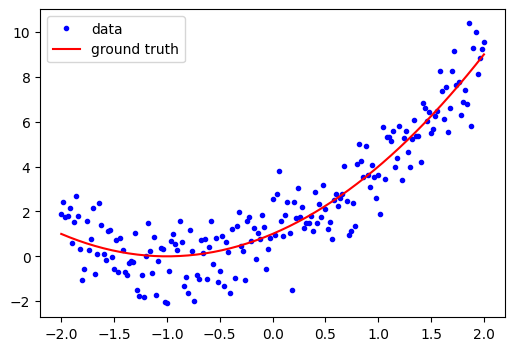

In [70]:
x = tf.linspace(-2, 2, 201)
x = tf.cast(x, tf.float32)

def f(x):
    y = x**2 + 2*x + 1
    return y

y = f(x) + tf.random.normal(shape=[201])

plt.plot(x.numpy(), y.numpy(), 'b.', label='data')
plt.plot(x.numpy(), f(x).numpy(), 'r-', label='ground truth')
plt.legend()

Create a quadratic model with randomly initialized weights and a bias:



In [64]:
class Model(tf.Module):
    def __init__(self):
        rand_init = tf.random.uniform(shape=[3], minval=0., maxval=5., seed=22)
        self.w_q = tf.Variable(rand_init[0], name='w_q')
        self.w_l = tf.Variable(rand_init[1], name='w_l')
        self.b = tf.Variable(rand_init[2], name='b')

    @tf.function
    def __call__(self, x):
        return self.w_q * x**2 + self.w_l * x + self.b

First, observe your model's performance before training:



In [65]:
quad_model = Model()

In [66]:
def plot_preds(x, y, f, model, title):
    plt.figure()
    plt.plot(x.numpy(), y.numpy(), 'b.', label='data')
    plt.plot(x.numpy(), f(x).numpy(), 'r-', label='ground truth')
    plt.plot(x.numpy(), model(x).numpy(), 'g-', label='predictions')
    plt.legend()
    plt.title(title)

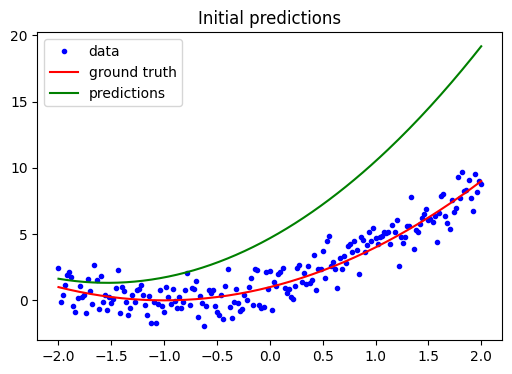

In [69]:
plot_preds(x, y, f, quad_model, 'Initial predictions')

Now, define a loss for your model:

Given that this model is intended to predict continuous values, the mean squared error (MSE) is a good choice for the loss function. Given a vector of predictions $\hat{y}$ and a vector of true targets $y$, the MSE is defined as the mean of the squared differences between the predicted values and the ground truth.
$
\begin{align}
\text{MSE} = \frac{1}{n}\sum_{i=1}^n(\hat{y}_i - y_i)^2
\end{align}
$

In [76]:
def mse_loss(y, y_pred):
    return tf.reduce_mean(tf.square(y - y_pred))

Write a basic training loop for the model. The loop will make use of the MSE loss function and its gradients with respect to the input in order to **iteratively update** the model's parameters. Using mini-batches for training provides both memory efficienciy and faster convergence. The `tf.data.Dataset` API has useful functions for batching and shuffling.

In [71]:
# x = tf.linspace(-2, 2, 201)
# y = f(x) + tf.random.normal(shape=[201])
batch_size = 32
dataset = tf.data.Dataset.from_tensor_slices((x, y)) # create a dataset from a tensor made of x and y
dataset = dataset.shuffle(buffer_size=x.shape[0]).batch(batch_size) # shuffle the dataset and create batches of size 32

Epoch  0: loss=14.8063
Epoch 10: loss=2.4799
Epoch 20: loss=1.5264
Epoch 30: loss=1.2247
Epoch 40: loss=1.1222
Epoch 50: loss=1.0871
Epoch 60: loss=1.0730
Epoch 70: loss=1.0686
Epoch 80: loss=1.0672
Epoch 90: loss=1.0666
Final loss: 1.0675


Text(0.5, 1.0, 'MSE Loss vs Training Epochs')

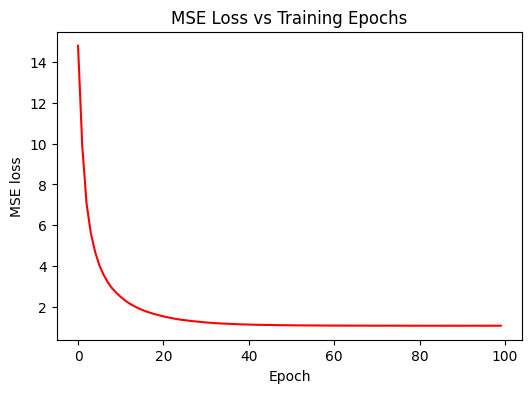

In [77]:
# Set training parameters
epochs = 100
learning_rate = 0.01
losses = []

# Format the training loop
for epoch in range(epochs):
    for x_batch, y_batch in dataset:
        with tf.GradientTape() as tape:
            y_pred = quad_model(x_batch)
            loss = mse_loss(y_batch, y_pred)
        grads = tape.gradient(loss, quad_model.variables) # compute the gradients of the loss with respect to the model variables
        for var, grad in zip(quad_model.variables, grads):
            var.assign_sub(learning_rate * grad)
    # Keep track of the loss for each epoch
    loss = mse_loss(y, quad_model(x))
    losses.append(loss)
    # Print the loss every 10 epochs
    if epoch % 10 == 0:
        print('Epoch {0:2d}: loss={1:.4f}'.format(epoch, loss))

# plot the model results
print('Final loss: {0:.4f}'.format(loss))
plt.plot(range(epochs), losses, 'r-')
plt.xlabel('Epoch')
plt.ylabel('MSE loss')
plt.title('MSE Loss vs Training Epochs')

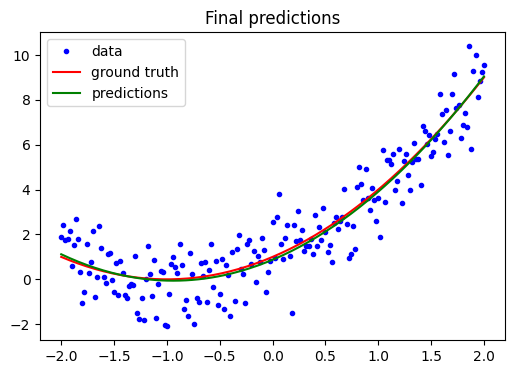

In [78]:
plot_preds(x, y, f, quad_model, 'Final predictions')

That's working, but remember that implementations of common training utilities are available in the tf.keras module. So, consider using those before writing your own. To start with, the `Model.compile` and `Model.fit` methods implement a training loop for you.

Begin by creating a **Sequential Model** in Keras using `tf.keras.Sequential`. One of the simplest Keras layers is the dense layer, which can be instantiated with `tf.keras.layers.Dense`. The dense layer is able to learn multidimensional linear relationships of the form $Y = XW + \vec{b}$. The dense layer's output is given by the following equation: 
$
\begin{align}
\text{output} = \text{activation}(\text{input} \cdot \text{kernel} + \text{bias})
\end{align}
$
In order to learn a nonlinear equation of the form $y = w_1x^2 + w_2x + b$,  the dense layer's input should be a data matrix with $x^2$ and $x$ as features, stacked one upon the other. The lambda layer, `tf.keras.layers.Lambda`, can be used to perform this stacking transformation.

In [85]:
new_model = tf.keras.Sequential([
    tf.keras.layers.Lambda(lambda x: tf.stack([x, x**2], axis=1)),
    tf.keras.layers.Dense(units=1, kernel_initializer=tf.random.normal)
])

In [86]:
new_model.compile(
    loss=tf.keras.losses.MSE,
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01)
)

history = new_model.fit(x, y,
    batch_size=32,
    epochs=100,
    verbose=2
)

new_model.save('./my_new_model')

Epoch 1/100
7/7 - 0s - loss: 5.6817 - 246ms/epoch - 35ms/step
Epoch 2/100
7/7 - 0s - loss: 2.8049 - 5ms/epoch - 738us/step
Epoch 3/100
7/7 - 0s - loss: 1.8333 - 5ms/epoch - 684us/step
Epoch 4/100
7/7 - 0s - loss: 1.4456 - 8ms/epoch - 1ms/step
Epoch 5/100
7/7 - 0s - loss: 1.2729 - 10ms/epoch - 1ms/step
Epoch 6/100
7/7 - 0s - loss: 1.2048 - 12ms/epoch - 2ms/step
Epoch 7/100
7/7 - 0s - loss: 1.1632 - 12ms/epoch - 2ms/step
Epoch 8/100
7/7 - 0s - loss: 1.1358 - 8ms/epoch - 1ms/step
Epoch 9/100
7/7 - 0s - loss: 1.1191 - 10ms/epoch - 1ms/step
Epoch 10/100
7/7 - 0s - loss: 1.1074 - 15ms/epoch - 2ms/step
Epoch 11/100
7/7 - 0s - loss: 1.0993 - 14ms/epoch - 2ms/step
Epoch 12/100
7/7 - 0s - loss: 1.0943 - 15ms/epoch - 2ms/step
Epoch 13/100
7/7 - 0s - loss: 1.0874 - 26ms/epoch - 4ms/step
Epoch 14/100
7/7 - 0s - loss: 1.0886 - 18ms/epoch - 3ms/step
Epoch 15/100
7/7 - 0s - loss: 1.0838 - 12ms/epoch - 2ms/step
Epoch 16/100
7/7 - 0s - loss: 1.0794 - 21ms/epoch - 3ms/step
Epoch 17/100
7/7 - 0s - loss: 1

INFO:tensorflow:Assets written to: ./my_new_model/assets


INFO:tensorflow:Assets written to: ./my_new_model/assets


Observe your Keras model's performance after training:

Text(0.5, 1.0, 'MSE Loss vs Training Epochs')

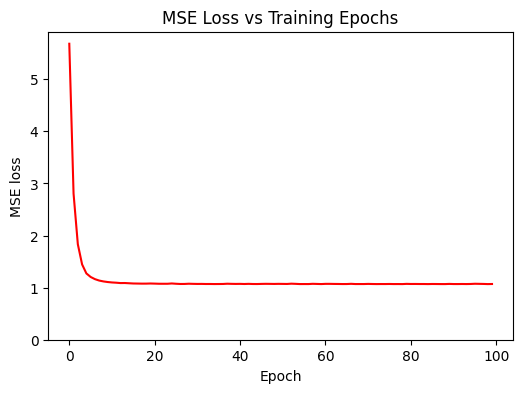

In [87]:
plt.plot(history.history['loss'], 'r-')
plt.xlabel('Epoch')
plt.ylim([0, max(plt.ylim())])
plt.ylabel('MSE loss')
plt.title('MSE Loss vs Training Epochs')

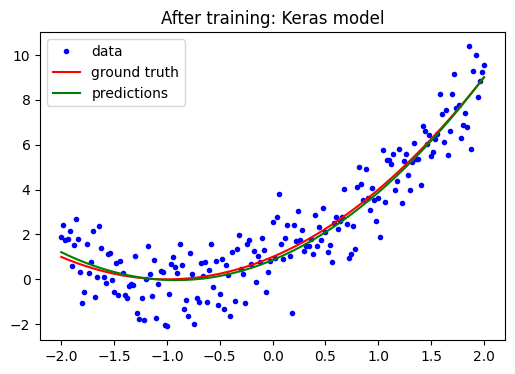

In [88]:
plot_preds(x, y, f, new_model, 'After training: Keras model')